I am not as good at coding as the rest of my peers and have used up my socially acceptable amount of questions to ask said peers for help on this programming assignment. With that, I have also ran out of time to google how to do everything else. apologies

# Problem 1

### Getting familiar with loading, visualizing and operating on multivariate data

A Hess diagram is a 2D plot coded by a third quantity.

Here's an example from the [astroML documentation](https://www.astroml.org/examples/datasets/plot_SDSS_SSPP.html) showing the temperature and surface gravity (how strongly the star would pull on you if you could stand on it's surface, including the effect of rotation), color coded on the left by density, and on the right by metallicity (measured here as the ratio of iron to hydrogen) with density contours.


<img src="https://www.astroml.org/_images/plot_SDSS_SSPP_1.png">

From http://das.sdss.org/va/stripe_82_variability/SDSS_82_public/, download eight HLC\*fits.gz files (and recall how you can use `astropy.io.fits` to load these)

The HLC files are each different bands on the sky.

For each HLC file, separate stars and galaxies by using the `MEAN_OBJECT_TYPE` column and making a cut with value > 5 to find stars.

For each HLC file, and separately for stars and galaxies make a 3-panel plot.

In the left plot show `r` vs `g-i` color coded by density (recall we did this with `seaborn`'s `jointplot`, but you can use whatever).

Estimate a bivariate distribution for `density(r, g-i)` this sample (recall we did with `seaborn`'s `jointplot` use `kde`, but you can use whatever).

In the middle and right panel, again plot `r` vs `g-i`, but now color-coded by proper motion in RA, and Dec. Overlay the density contors.

Comment on the structure in stars vs galaxies, and the evolution with position on the sky in each HLC.


In [216]:
from astropy.io import fits
import matplotlib.pyplot as plt
from os import listdir
from astropy.table import Table
from os.path import isfile, join
import numpy as np
import seaborn as sb

In [217]:
f1 = fits.open('/Users/bflucero/Desktop/ast596/ast596_2020_Spring/homework/breannalucero/HLC files HW1/HLC.RA_00_to_01.fits')
f2 = fits.open('/Users/bflucero/Desktop/ast596/ast596_2020_Spring/homework/breannalucero/HLC files HW1/HLC.RA_01_to_02.fits')
f3 = fits.open('/Users/bflucero/Desktop/ast596/ast596_2020_Spring/homework/breannalucero/HLC files HW1/HLC.RA_02_to_03.fits')
f4 = fits.open('/Users/bflucero/Desktop/ast596/ast596_2020_Spring/homework/breannalucero/HLC files HW1/HLC.RA_03_to_04.fits')
f5 = fits.open('/Users/bflucero/Desktop/ast596/ast596_2020_Spring/homework/breannalucero/HLC files HW1/HLC.RA_20_to_21.fits')
f7 = fits.open('/Users/bflucero/Desktop/ast596/ast596_2020_Spring/homework/breannalucero/HLC files HW1/HLC.RA_22_to_23.fits')
f8 = fits.open('/Users/bflucero/Desktop/ast596/ast596_2020_Spring/homework/breannalucero/HLC files HW1/HLC.RA_23_to_24.fits')
f6 = fits.open('/Users/bflucero/Desktop/ast596/ast596_2020_Spring/homework/breannalucero/HLC files HW1/HLC.RA_21_to_22.fits')

In [299]:
HLC1 = f1[1].data
HLC1['MEAN_OBJECT_TYPE']

RA = HLC1['RA_pm']
Dec = HLC1['Dec_pm']

stars = []
galaxies = []

for i,x in enumerate(HLC1['MEAN_OBJECT_TYPE']):
    if x > 5:
        stars.append(i)
        
for i,x in enumerate(HLC1['MEAN_OBJECT_TYPE']):
    if x < 5:
        galaxies.append(i)       
        
r_mag_star = HLC1['MEAN_PSFMAG'][stars][:,2]
gmini_star = HLC1['MEAN_PSFMAG'][stars][:,1] - HLC1['MEAN_PSFMAG'][stars][:,3]
        
r_mag_galaxies = HLC1['MEAN_PSFMAG'][galaxies][:,2]
gmini_galaxies = HLC1['MEAN_PSFMAG'][galaxies][:,1] - HLC1['MEAN_PSFMAG'][galaxies][:,3]

#print(f1[1].header)
#print(HLC1['MEAN_PSFMAG'][stars])
#print(HLC1['MEAN_PSFMAG'][:,2])

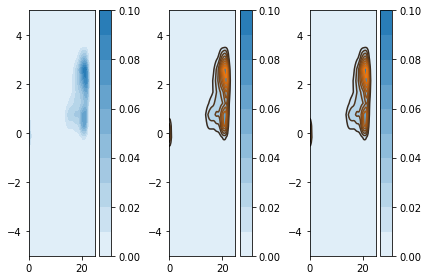

In [312]:
f.set_figheight(10)
f.set_figwidth(50)
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)

ax1.set_ylim(-5,5)
ax1.set_xlim(0,25)
ax2.set_ylim(-5,5)
ax2.set_xlim(0,25)
ax3.set_ylim(-5,5)
ax3.set_xlim(0,25)

sb.kdeplot(r_mag_star[::50], gmini_star[::50], ax=ax1, shade = True, cbar = True)
sb.kdeplot(r_mag_star[::50], gmini_star[::50], ax=ax2, shade = True, cbar = True)
sb.kdeplot(r_mag_star[::50], gmini_star[::50], ax=ax2, shade = False, c = RA)
sb.kdeplot(r_mag_star[::50], gmini_star[::50], ax=ax3, shade = True, cbar = True)
sb.kdeplot(r_mag_star[::50], gmini_star[::50], ax=ax3, shade = False, c = Dec)

plt.tight_layout()

# Problem 2

### Comparing distributions to a standard normal distribution

Load the `IntroStat_demo.csv` file in the data directory (use `pandas` or `astropy` or whatever you like).

Estimate the sample mean and variance of the suspiciously named `mag.outlier` column.

Make a Q-Q plot of the `mag.outlier` column and over plot a line with `Y = Mean + Sigma*X` on it. 

Calculate the values of the first and third quartiles, and use some linear algebra to figure out the equation of a line passing through them (google line 2 point form if you need a refresher on the linear algebra)

Overplot that line passing through the data.

Now try the same thing with `mag.het`. Describe what you found?

What happens if you rescale the data? Subtract of the sample mean of `mag.het` and divide by `mag.het.error`. Now repeat the Q-Q plot with this quantity. 

Describe what's going on.

<Figure size 2160x1800 with 0 Axes>

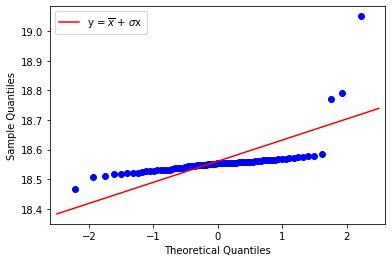

In [163]:
import pandas as pd
import statsmodels.api as sm

stats = pd.read_csv('/Users/bflucero/Desktop/ast596/ast596_2020_Spring/data/01/IntroStat_demo.csv')
outliers = np.array(stats['mag.outlier'])

mean = np.mean(outliers)
sigma = np.sqrt(np.var(outliers))

plt.figure(figsize=(30,25))
fig = sm.qqplot(outliers)
x = np.linspace(-2.5,2.5,100)
y = mean + sigma*x
plt.plot(x, y, '-r', label='y = $\overline{x}$ + $\sigma$x')
plt.legend()

In [108]:
print(outliers)

[18.53067741 18.55156043 18.46809544 18.53736824 18.79052101 18.5484733
 18.57389487 18.58385375 18.55051367 18.55627943 18.55570376 18.55495439
 18.54837424 18.54155049 18.54333728 18.53924894 18.77060703 18.56263718
 18.52214174 18.56785208 19.05058968 18.55695516 18.5586264  18.5662732
 18.54577395 18.54960564 18.53814685 18.53747636 18.50675539 18.57006176
 18.57850418 18.51872247 18.55245687 18.55933597 18.5531114  18.57421901
 18.57754636 18.56309729 18.55914489 18.52396585 18.55902283 18.56014149
 18.5565164  18.51997416 18.55759143 18.56565219 18.51953343 18.56716842
 18.5112243  18.52635593 18.55538613 18.54720653 18.54499055 18.54707486
 18.55391538 18.52823706 18.53023576 18.57273861 18.55503703 18.53444977
 18.56384012 18.52966415 18.56417305 18.53060676 18.55450872 18.52899907
 18.54325478 18.53198869 18.56591053 18.57167751 18.5546561  18.55350843
 18.55838631 18.5184627 ]


In [129]:
#caclulate percentiles (approximate values for y1 and y2)
Q1 = np.percentile(outliers, 25)
Q2 = np.percentile(outliers, 75)

#gotta make that array boi into a list to access indices and sort them numerically to use formuoli below
list_o = list(outliers)
list_o.sort()

#these will give you the ACTUAL values in the outliers list 
#(remember that quantile values calculated are not actually in the array)
i1 = np.where(np.isclose(list_o, 18.5373952724961))
i2 = np.where(np.isclose(list_o, 18.56298225840465))

print(outliers[i1], outliers[i2])

#NOTE: use value closest to Q1 and Q3 printed below
#in this case, 18.52214174 for 1st quant and 18.52823706 for third quant

[18.52214174 18.56785208] [18.52823706]


In [102]:
print(list_o)
len(list_o)
#NOTE: this part sux: list has added more sig figs idk why!
#You have to use your eyes to find the values the above outputs were referring to

[18.4680954415675, 18.5067553864728, 18.511224298484603, 18.5184626994895, 18.518722470096396, 18.5195334326354, 18.5199741555534, 18.522141743808, 18.523965847213, 18.526355930414102, 18.5282370595513, 18.5289990734953, 18.529664151435398, 18.530235760623, 18.530606762706398, 18.530677411478898, 18.531988686918602, 18.534449768215, 18.5373682418528, 18.537476364426, 18.5381468484592, 18.5392489410442, 18.5415504934681, 18.5432547797487, 18.5433372839744, 18.544990547003803, 18.5457739476833, 18.5470748575154, 18.5472065305838, 18.548374238575, 18.5484733020366, 18.5496056417444, 18.550513668939303, 18.5515604297523, 18.552456867270102, 18.553111399872602, 18.5535084329554, 18.553915380597, 18.5545087175195, 18.5546561015614, 18.5549543912184, 18.555037029373697, 18.5553861340442, 18.5557037579903, 18.556279430592102, 18.5565164042252, 18.5569551618032, 18.5575914312487, 18.558386306920603, 18.5586263953885, 18.559022834336698, 18.5591448931475, 18.559335965917803, 18.5601414916841, 18

74

In [101]:
#FINALLY get indices (this will be your i value in equation below)
i1x = list_o.index(18.5373682418528)
i2x = list_o.index(18.563097285970898)

print(i1x,i2x)

18 55


In [110]:
#equation for theoretical quantiles x(i) = (i-0.05)/n 
#where i = index and n = number of quantities in list

x1 = (18-.05)/74
x2 = (55-.05)/74

y1 = 18.52214174
y2 = 18.52823706

print('(x1,y1)=', x1,',','18.52214174')
print('(x2,y2)=', x2,',','18.52823706')

(x1,y1)= 0.24256756756756756 , 18.52214174
(x2,y2)= 0.7425675675675676 , 18.52823706


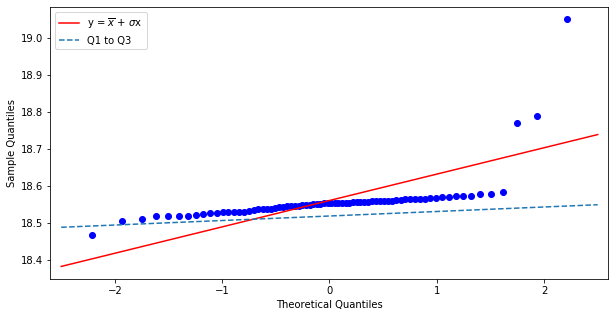

In [164]:
m = (y2-y1)/(x2-x1)
yQ = m*x - m*x1 + y1

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1,1,1)
nmin,nmax = ax.get_xlim()
nvals = np.arange(-2.5,2.5, 0.01)
fig = sm.qqplot(outliers, ax=ax)
y = mean + sigma*x

ax.plot(x, y, '-r', label='y = $\overline{x}$ + $\sigma$x')
ax.plot(x, yQ, '--', label='Q1 to Q3')
ax.legend()

0.0


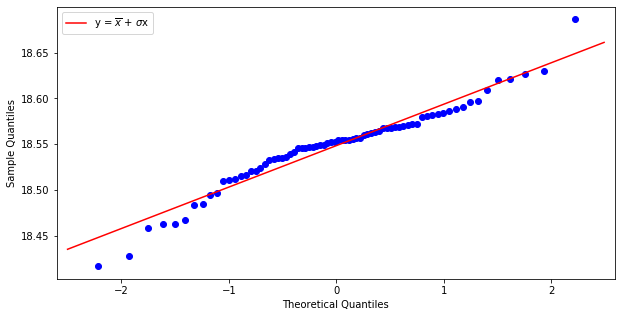

In [165]:
het = stats['mag.het']

mean_het = np.mean(het)
sigma_het = np.sqrt(np.var(het))

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot()
nmin, nmax = ax.get_xlim()
sm.qqplot(het, ax=ax)
x = np.arange(-2.5,2.5,0.01)
yhet = mean_het + sigma_het*x
ax.plot(x, yhet, '-r', label='y = $\overline{x}$ + $\sigma$x')
ax.legend() 
print(nmin)

In [179]:
#caclulate percentiles (approximate values for y1 and y2)
Q1het = np.percentile(het, 25)
Q2het = np.percentile(het, 75)

#gotta make that array boi into a list to access indices and sort them numerically to use formuoli below
het_o = list(het)
het_o.sort()

#these will give you the ACTUAL values in the outliers list 
#(remember that quantile values calculated are not actually in the array)
i1het = np.where(np.isclose(het_o, 18.520940292734398))
i2het = np.where(np.isclose(het_o, 18.570569962457924))

print(i1het,i2het)

(array([15, 16]),) (array([], dtype=int64),)


In [184]:
print(het[55])

18.5552308890188


In [181]:
i1xhet = het_o.index(18.520940292734398)
i2xhet = het_o.index(18.5708663214191)

print(i1xhet,i2xhet)

15 55


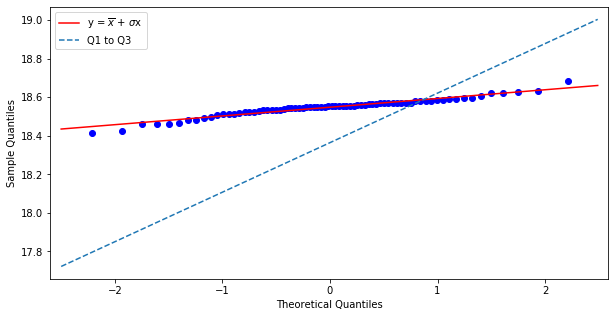

In [188]:
x1 = (15-.05)/74
x2 = (55-.05)/74

y1 = 18.4163400443553
y2 = 18.5552308890188

mhet = (y2-y1)/(x2-x1)
yQhet = mhet*x - mhet*x1 + y1

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1,1,1)
nmin,nmax = ax.get_xlim()
nvals = np.arange(-2.5,2.5, 0.01)
fig = sm.qqplot(het, ax=ax)
y = mean_het + sigma_het*x

ax.plot(x, y, '-r', label='y = $\overline{x}$ + $\sigma$x')
ax.plot(x, yQhet, '--', label='Q1 to Q3')
ax.legend()

# Problem 3

The demo data set for this part is the Wesenheit index of the OGLE-III fundamental-mode and first overtone classical Cepheids. 

These stars are awesome because you can use them to measure distances. Here's a nice [youtube video](https://www.youtube.com/watch?v=iyisAjHdhas) on these stars.

You'll try to estimate their period-luminosity relationship. 

The Wesenheit index is defined as `W = I - 1.55(V - I)`, and its main advantage over using simply the I or V photometry is that it is insensitive to extinction. It is denoted by 'W' among the data columns. 

Other columns are 'name', the identifier of the star; 'RA0' (in decimal hours) and 'Decl0' (in decimal degrees), celestial coordinates; 'Mode', the mode of the Cepheid ('F' indicates fundamental-mode, '1' indicates first overtone star); 'Cloud', indicating which Magellanic Cloud the star belongs to; 'logP1', the base-10 logarithm of the period in days; 'VI', the colour V-I.


Split the data into LMC and SMC, and then again by mode F and 1, and plot the `W` on the y-axis vs `log(P1)` on x.
Fit or estimate straight lines to each of the four samples (you can use `statsmodels` `astropy` `scipy` `numpy`....)
(Yes, we've not covered fitting straight lines. That's OK.)

Compute the residuals of each sample to it's respective line. Do these residuals look like a normal distribution? If not, speculate on why (WATCH THE YOUTUBE VIDEO!)

Plot the residuals color coded by if they are positive or negative vs RA and Dec (just like a Hess diagram in Problem 1).

Finally, plot the residuals against the fitted `W` values, and just to anticipate the next homework assignment, also plot `log(P1) vs V-I`. Comment on what you are seeing.

In [254]:
ceph = pd.read_csv('/Users/bflucero/Desktop/ast596/ast596_2020_Spring/data/01/Cepheids.csv')

print(ceph)

                   name       RA0      Decl0 Mode Cloud         W     logP1  \
0     OGLE-LMC-CEP-0002  4.529733 -69.819330    F   LMC  14.52500  0.493893   
1     OGLE-LMC-CEP-0005  4.592089 -69.734970    F   LMC  13.49540  0.749122   
2     OGLE-LMC-CEP-0012  4.630203 -67.214420    F   LMC  14.54210  0.424912   
3     OGLE-LMC-CEP-0016  4.642367 -67.646310    F   LMC  12.03300  1.021456   
4     OGLE-LMC-CEP-0017  4.649119 -69.688390    F   LMC  14.34215  0.565524   
...                 ...       ...        ...  ...   ...       ...       ...   
7264  OGLE-SMC-CEP-4622  1.404808 -73.269361    1   SMC  15.94460  0.141140   
7265  OGLE-SMC-CEP-4624  1.406767 -74.192639    1   SMC  15.29565  0.102449   
7266  OGLE-SMC-CEP-4625  1.407181 -72.936056    1   SMC  15.33725  0.074740   
7267  OGLE-SMC-CEP-4627  1.413575 -72.599167    1   SMC  14.06670  0.501477   
7268  OGLE-SMC-CEP-4628  1.419358 -73.926583    1   SMC  16.53315 -0.438446   

         VI  
0     0.740  
1     0.752  
2     0.5

In [257]:
cephs_LMC = ceph[ceph['Cloud'] == 'LMC']
cephsF_LMC = cephs_LMC[cephs_LMC['Mode'] == 'F']
cephs1_LMC = cephs_LMC[cephs_LMC['Mode'] == '1']

cephs_SMC = ceph[ceph['Cloud'] == 'SMC']
cephsF_SMC = cephs_SMC[cephs_SMC['Mode'] == 'F']
cephs1_SMC = cephs_SMC[cephs_SMC['Mode'] == '1']

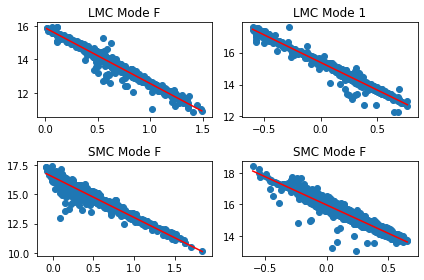

In [288]:
fig, ax = plt.subplots(2,2)

ax[0, 0].set_title('LMC Mode F')
ax[0,0].scatter(cephsF_LMC['logP1'], cephsF_LMC['W'])
x = cephsF_LMC['logP1']
y = cephsF_LMC['W']
ax[0,0].plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)), c = 'r')


ax[0, 1].set_title('LMC Mode 1')
ax[0,1].scatter(cephs1_LMC['logP1'], cephs1_LMC['W'])
x1 = cephs1_LMC['logP1']
y1 = cephs1_LMC['W']
ax[0,1].plot(np.unique(x1), np.poly1d(np.polyfit(x1, y1, 1))(np.unique(x1)), c = 'r')

ax[1, 0].set_title('SMC Mode F')
ax[1,0].scatter(cephsF_SMC['logP1'], cephsF_SMC['W'])
x2 = cephsF_SMC['logP1']
y2 = cephsF_SMC['W']
ax[1,0].plot(np.unique(x2), np.poly1d(np.polyfit(x2, y2, 1))(np.unique(x2)), c = 'r')

ax[1, 1].set_title('SMC Mode F')
ax[1,1].scatter(cephs1_SMC['logP1'], cephs1_SMC['W'])
x3 = cephs1_SMC['logP1']
y3 = cephs1_SMC['W']
ax[1,1].plot(np.unique(x3), np.poly1d(np.polyfit(x3, y3, 1))(np.unique(x3)), c = 'r')

plt.tight_layout()